## Stock Price

In [61]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

data = yf.download(
    'AAPL',
    start = '2015-01-01',
    end = pd.to_datetime('today')
)

[*********************100%%**********************]  1 of 1 completed


In [62]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.435272,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.746885,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.749126,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.082138,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.007431,237458000


#### Data Preprocessing

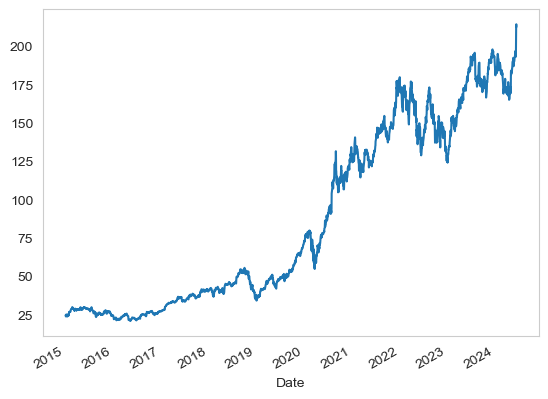

In [63]:
data['Adj Close'].plot()
plt.grid(False)
plt.show()

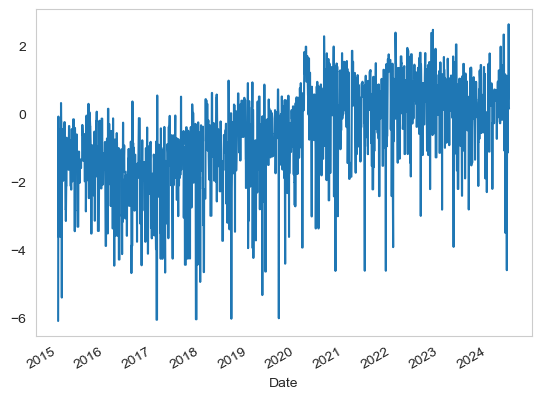

In [64]:
import warnings
warnings.filterwarnings('ignore')

np.log(data['Adj Close'].diff()).replace([np.inf, -np.inf], np.nan).ffill().plot()
plt.grid(False)
plt.show()

In [121]:
X_train = data['Adj Close'].pct_change().loc[:'2023'].dropna()
X_test = data['Adj Close'].pct_change().loc['2024':]

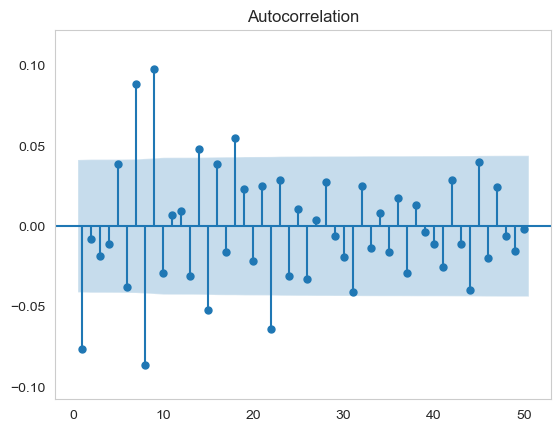

In [122]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(
    X_train, 
    lags = range(1, 51),
    auto_ylims = True
)
plt.grid(False)
plt.show()

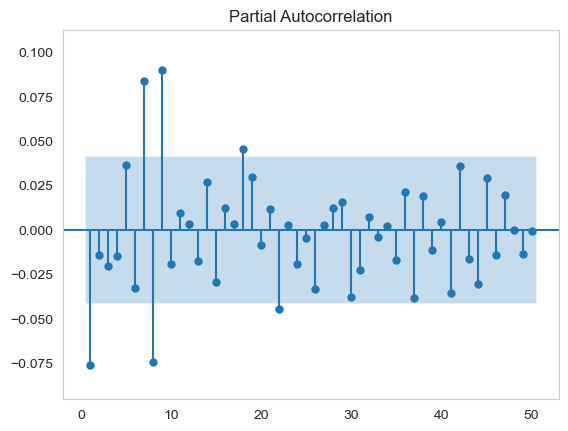

In [123]:
plot_pacf(
    X_train,
    lags = range(1, 51),
    auto_ylims = True
)
plt.grid(False)
plt.show()

In [124]:
import statsmodels.api as sm

arima = sm.tsa.ARIMA(
    X_train,
    order = (18, 0, 21),
    trend = 't'
).fit(method = 'innovations_mle')

In [125]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 2263
Model:               ARIMA(18, 0, 21)   Log Likelihood                5902.485
Date:                Sun, 16 Jun 2024   AIC                         -11722.970
Time:                        01:58:42   BIC                         -11488.268
Sample:                             0   HQIC                        -11637.330
                               - 2263                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          7.682e-07   2.41e-07      3.190      0.001    2.96e-07    1.24e-06
ar.L1         -0.3583      0.373     -0.960      0.337      -1.090       0.373
ar.L2         -0.1594      0.236     -0.675      0.500      -0.622       0.303
ar.L3         -0.1599      0.174     -0.917      0.359      -0.502       0.182
ar.L4         -0.0767      0.169     -0.455      0.649      -0.407       0.254
ar.L5          0.0605      0.116      0.521      0.602      -0.167       0.288
ar.L6         -0.0179      0.112     -0.160      0.873      -0.237       0.201
ar.L7          0.6970      0.089      7.866      0.000       0.523       0.871
ar.L8          0.1173      0.298      0.393      0.694      -0.467       0.702
ar.L9          0.7933      0.191      4.145      0.000       0.418       1.168
ar.L10         0.3552      0.244      1.453      0.146      -0.124       0.834
ar.L11         0.4336      0.259      1.674      0.094      -0.074       0.941
ar.L12         0.2626      0.092      2.855      0.004       0.082       0.443
ar.L13         0.0140      0.141      0.099      0.921      -0.262       0.290
ar.L14        -0.1056      0.111     -0.947      0.344      -0.324       0.113
ar.L15         0.3038      0.107      2.827      0.005       0.093       0.514
ar.L16        -0.3893      0.174     -2.240      0.025      -0.730      -0.049
ar.L17        -0.5622      0.250     -2.248      0.025      -1.052      -0.072
ar.L18        -0.4391      0.285     -1.539      0.124      -0.998       0.120
ma.L1          0.3088      0.374      0.827      0.408      -0.423       1.041
ma.L2          0.1172      0.236      0.497      0.619      -0.345       0.579
ma.L3          0.1386      0.187      0.740      0.459      -0.229       0.506
ma.L4          0.0631      0.173      0.365      0.715      -0.276       0.402
ma.L5         -0.0322      0.116     -0.279      0.780      -0.259       0.194
ma.L6          0.0064      0.107      0.059      0.953      -0.204       0.216
ma.L7         -0.6426      0.086     -7.490      0.000      -0.811      -0.474
ma.L8         -0.1089      0.281     -0.387      0.698      -0.660       0.442
ma.L9         -0.7163      0.174     -4.109      0.000      -1.058      -0.375
ma.L10        -0.3224      0.227     -1.418      0.156      -0.768       0.123
ma.L11        -0.3871      0.243     -1.591      0.112      -0.864       0.090
ma.L12        -0.2162      0.087     -2.490      0.013      -0.386      -0.046
ma.L13         0.0010      0.130      0.008      0.994      -0.253       0.255
ma.L14         0.0854      0.108      0.790      0.430      -0.127       0.297
ma.L15        -0.3058      0.103     -2.979      0.003      -0.507      -0.105
ma.L16         0.3187      0.174      1.834      0.067      -0.022       0.659
ma.L17         0.5811      0.232      2.508      0.012       0.127       1.035
ma.L18         0.3685      0.283      1.302      0.193      -0.186       0.923
ma.L19        -0.0385      0.035     -1.111      0.266      -0.106       0.029
ma

In [126]:
arima_pred = arima.forecast(
    len(X_test)
)

arima_pred = pd.Series(
    arima_pred.values,
    index = X_test.index
)

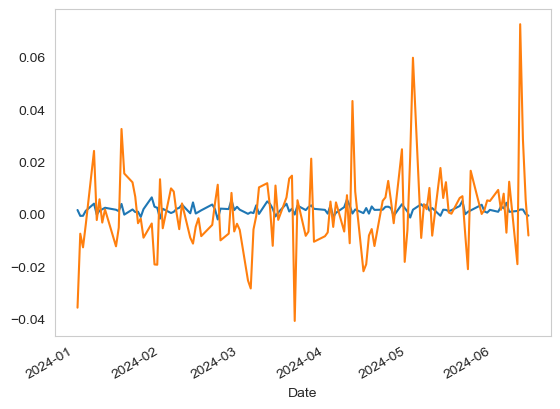

In [127]:
arima_pred.plot()
X_test.plot()
plt.grid(False)
plt.show()

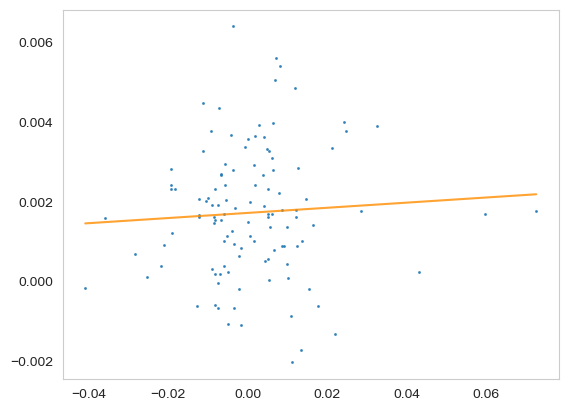

In [129]:
m, b = np.polyfit(X_test, arima_pred, 1)
plt.scatter(
    X_test,
    arima_pred,
    s = 5,
    alpha = 0.75,
    marker = '.'
)
plt.plot(
    np.sort(X_test), 
    m * np.sort(X_test) + b,
    color = 'darkorange', 
    alpha = 0.8
)
plt.grid(False)
plt.show()